In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [2]:
spx = pd.read_csv('../dataset/Assets/spx.csv', encoding='unicode_escape')

In [3]:
spx.head()

,time,close
0,1997-09-09T00:00:00+02:00,934.00
1,1997-09-10T00:00:00+02:00,915.25
2,1997-09-11T00:00:00+02:00,918.25
3,1997-09-12T00:00:00+02:00,933.75
4,1997-09-15T00:00:00+02:00,931.50


In [4]:
#Cleaning and reindexing
def cleaned_asset(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '2000-01-01') & (df.index <= '2022-11-02')]
    return df

In [5]:
spx = cleaned_asset(spx)

In [6]:
#SP500 price visualization
def spx_visualization(): 
    plt.plot(spx, color= 'b')
    plt.title('S&P 500', fontsize= 20)
    plt.xlabel('Year', fontsize= 20)
    plt.ylabel('Price', fontsize= 20)
    plt.style.use('seaborn')
    return plt.show()

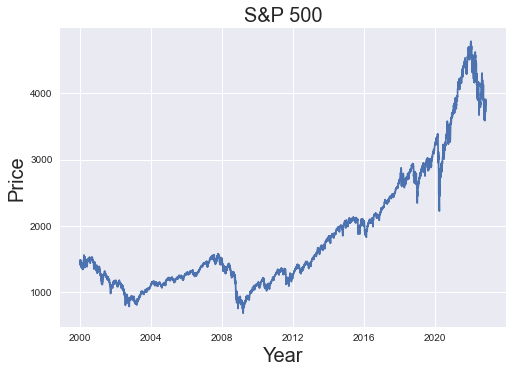

In [8]:
spx_visualization()

In [9]:
m2 = pd.read_csv ('../dataset/Indicators/monetary_supply.csv', encoding='unicode_escape')

def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '2000-01-01') & (df.index <= '2022-11-02')]
    return df

m2 = cleaned_indicator(m2)

In [10]:
#SP500 vs Monetary Supply
def m2_vs_spx():
    fig, ax1 = plt.subplots()
    
    ax1.set_xlabel('Years', fontsize= 20)
    ax1.set_ylabel('Price', color='black', fontsize= 16)
    ax1.plot(spx.index, spx.close, color='black', label = 'SP 500', linewidth=1.5, linestyle='solid')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(bbox_to_anchor=(1.1, 1.05), loc = 'upper left')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Monetary Supply (M2 in billions)', color="green", fontsize= 16)  # we already handled the x-label with ax1
    ax2.plot(m2.index, m2['close (in billions)'], color="green", label = 'M2', linewidth=1, linestyle='dashdot')
    ax2.tick_params(axis='y', labelcolor="green")
    ax2.legend(bbox_to_anchor=(1.1, 1), loc = 'upper left')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title("SP 500 vs M2", fontsize= 20)
    plt.style.use('seaborn-dark')
    print(plt.style.available)
    
    return plt.show()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


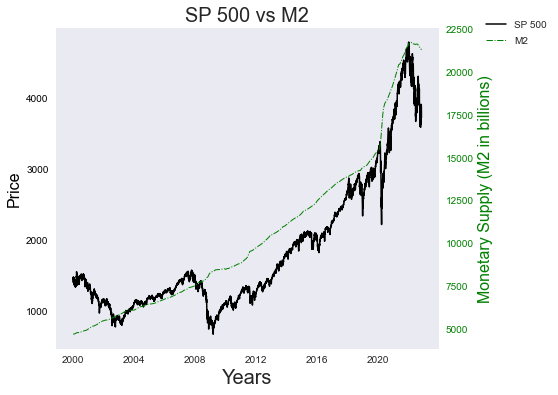

In [12]:
m2_vs_spx()